In [21]:
# %% [markdown]
# # 🎬 Netflix Data Analysis - EDA
# ## Исследовательский анализ данных Netflix
# 
# **Цель:** Исследовать тенденции и закономерности в каталоге Netflix
# 
# ## 1. Импорт библиотек и настройка
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Настройка стилей
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [22]:
# ## 2. Загрузка данных
# %%
# Загружаем данные
df = pd.read_csv('../data/netflix_titles.csv')

# Первичный осмотр
print("Размер данных:", df.shape)
print("\nСтолбцы:", df.columns.tolist())
print("\nТипы данных:")
print(df.info())

Размер данных: (8807, 12)

Столбцы: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


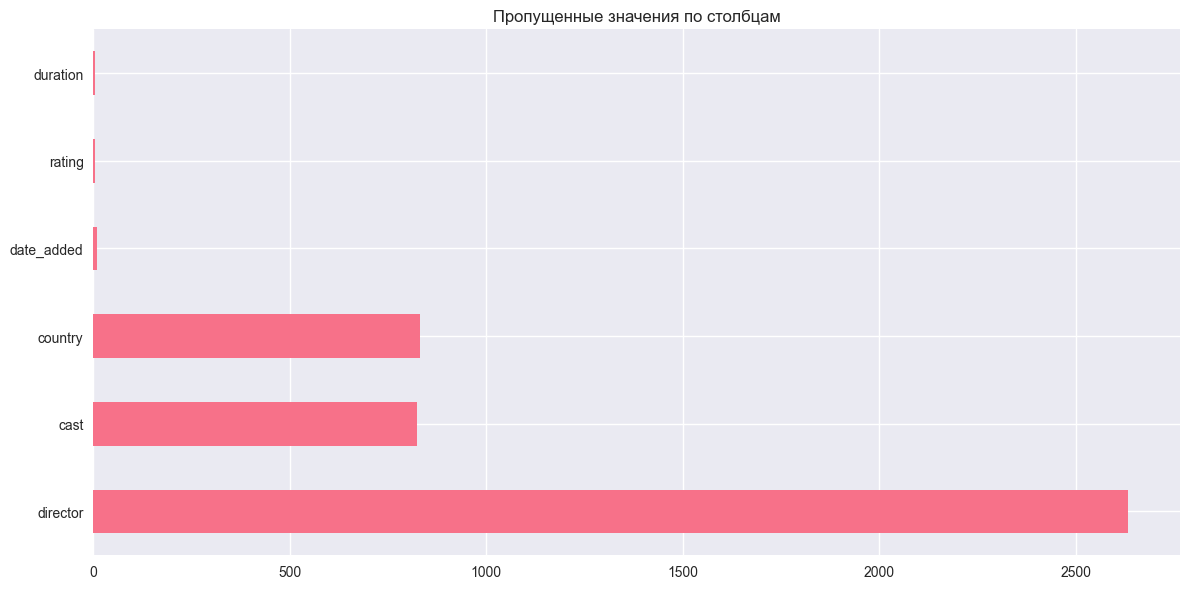

Общая информация:
Всего записей: 8807
Фильмы: 6131
Сериалы: 2676
Период выпуска: 1925 - 2021


In [23]:
# ## 3. Предварительный анализ и очистка
# %%
# Пропущенные значения
plt.figure(figsize=(12, 6))
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.plot(kind='barh')
plt.title('Пропущенные значения по столбцам')
plt.tight_layout()
plt.savefig('../images/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Базовая информация
print("Общая информация:")
print(f"Всего записей: {len(df)}")
print(f"Фильмы: {len(df[df['type'] == 'Movie'])}")
print(f"Сериалы: {len(df[df['type'] == 'TV Show'])}")
print(f"Период выпуска: {df['release_year'].min()} - {df['release_year'].max()}")

# %% [markdown]

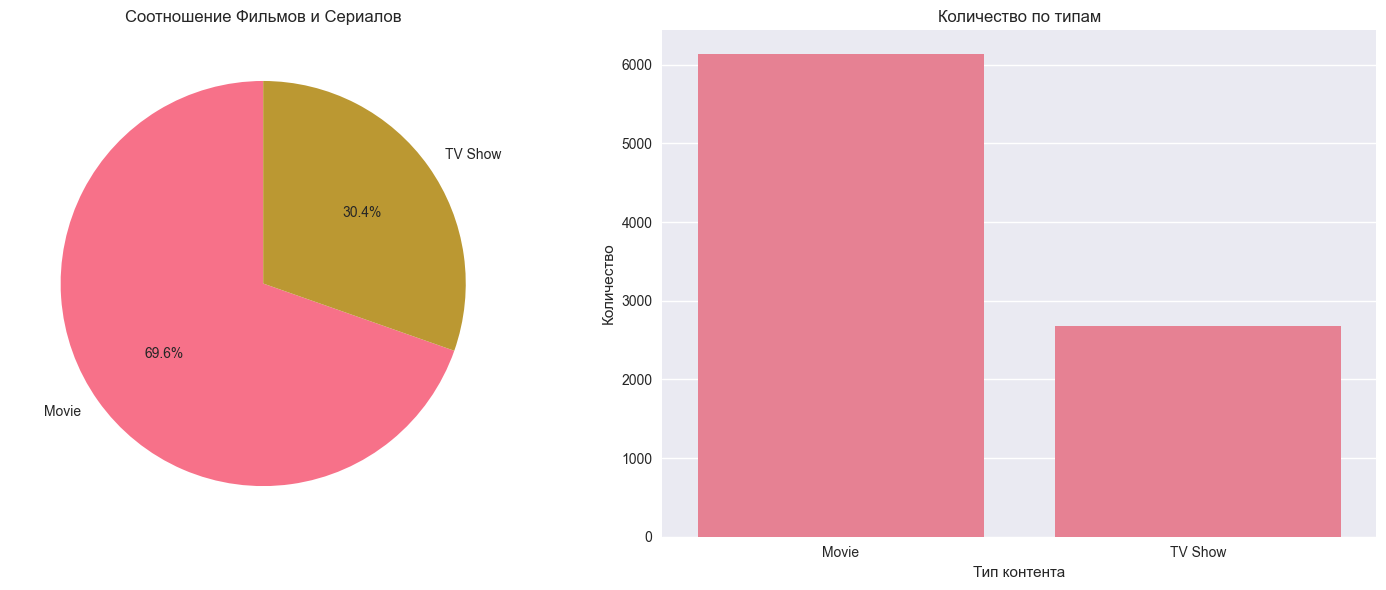

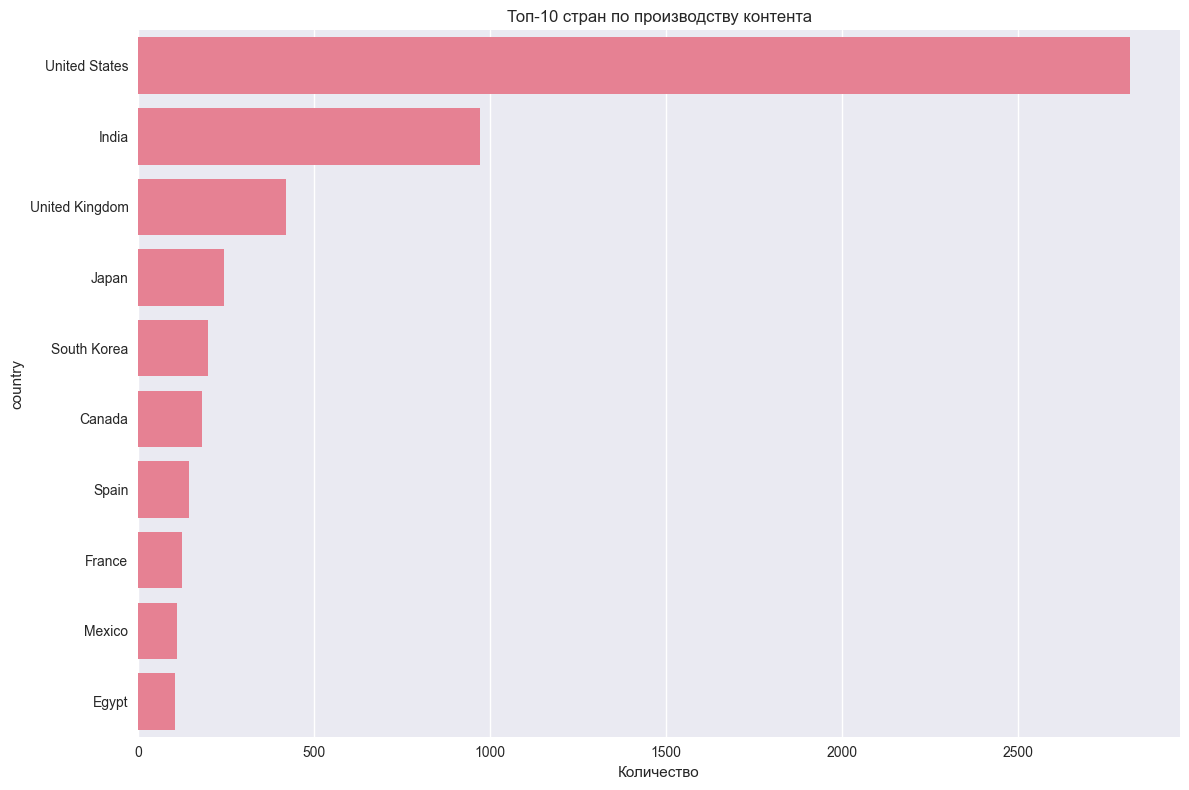

In [25]:
# ## 4. Анализ распределений
# %%
# Распределение по типам контента
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Круговая диаграмма
type_counts = df['type'].value_counts()
ax1.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Соотношение Фильмов и Сериалов')

# Столбчатая диаграмма
sns.countplot(data=df, x='type', ax=ax2)
ax2.set_title('Количество по типам')
ax2.set_xlabel('Тип контента')
ax2.set_ylabel('Количество')

plt.tight_layout()
plt.savefig('../images/content_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Топ-10 стран производства
plt.figure(figsize=(12, 8))
country_counts = df['country'].value_counts().head(10)
sns.barplot(y=country_counts.index, x=country_counts.values)
plt.title('Топ-10 стран по производству контента')
plt.xlabel('Количество')
plt.tight_layout()
plt.savefig('../images/top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]

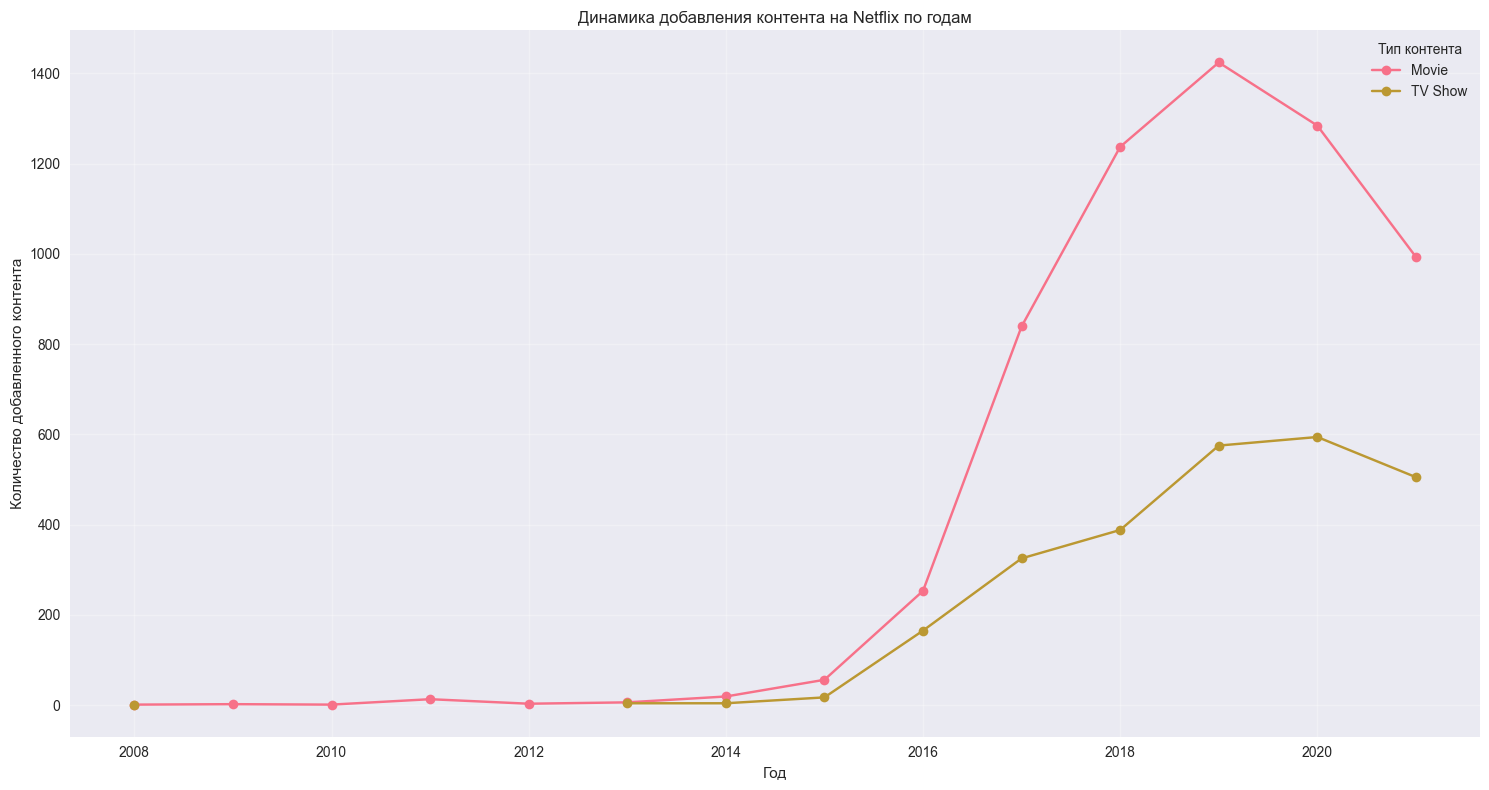

In [26]:
# ## 5. Временные тенденции
# %%
# Контент добавленный по годам
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(15, 8))

# Группируем по году и типу
yearly_content = df.groupby(['year_added', 'type']).size().unstack()

yearly_content.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Динамика добавления контента на Netflix по годам')
plt.xlabel('Год')
plt.ylabel('Количество добавленного контента')
plt.grid(True, alpha=0.3)
plt.legend(title='Тип контента')
plt.tight_layout()
plt.savefig('../images/trends_overtime.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]

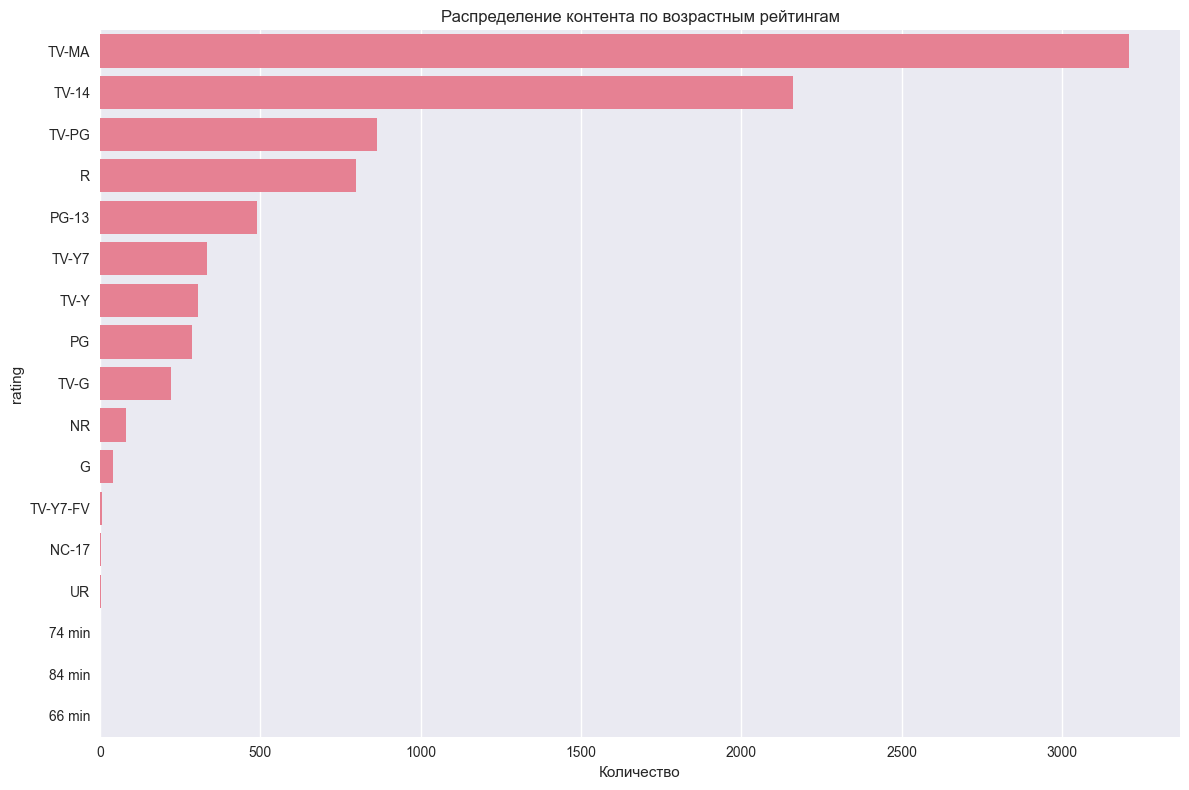

In [27]:
# %% [markdown]
# ## 6. Анализ рейтингов
# %%
# Распределение по возрастным рейтингам
plt.figure(figsize=(12, 8))
rating_order = df['rating'].value_counts().index
sns.countplot(data=df, y='rating', order=rating_order)
plt.title('Распределение контента по возрастным рейтингам')
plt.xlabel('Количество')
plt.tight_layout()
plt.savefig('../images/rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]

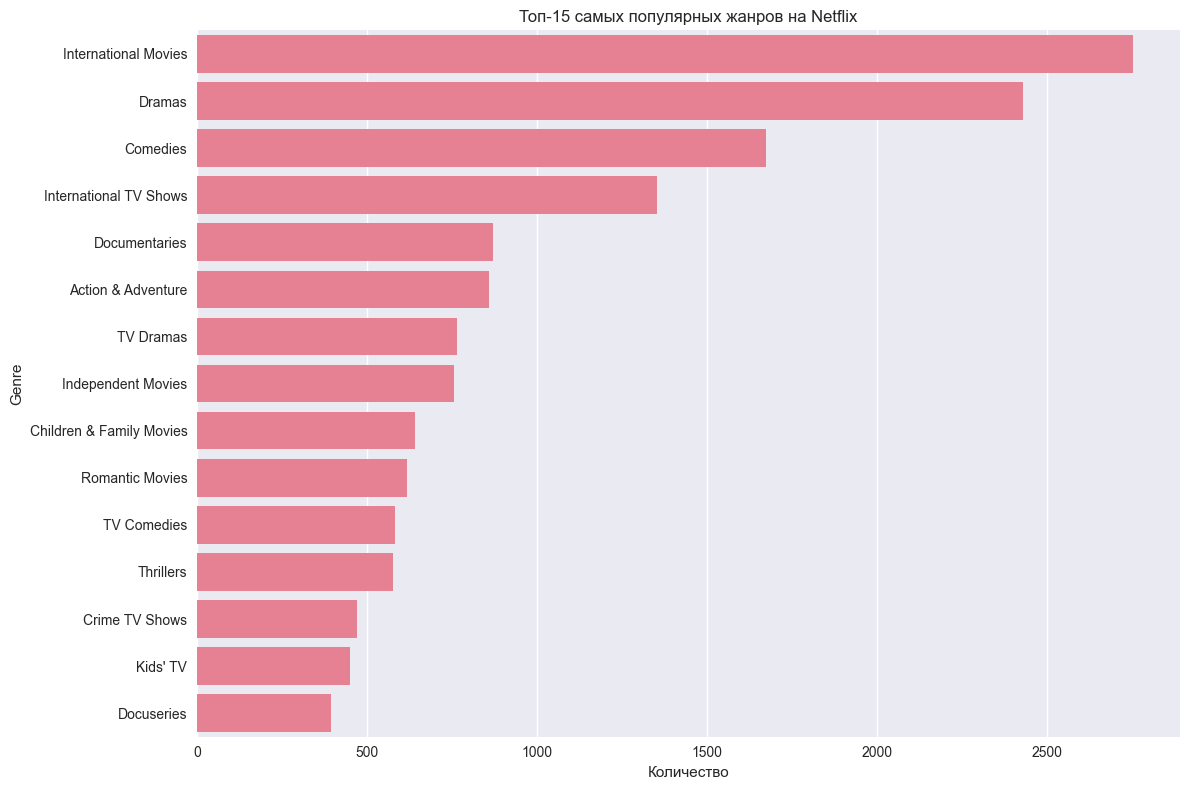

In [28]:
# ## 7. Анализ жанров
# %%
# Самые популярные жанры
all_genres = []
for genres in df['listed_in'].dropna():
    all_genres.extend([x.strip() for x in genres.split(',')])

genre_counts = Counter(all_genres).most_common(15)

plt.figure(figsize=(12, 8))
genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
sns.barplot(data=genres_df, y='Genre', x='Count')
plt.title('Топ-15 самых популярных жанров на Netflix')
plt.xlabel('Количество')
plt.tight_layout()
plt.savefig('../images/top_genres.png', dpi=300, bbox_inches='tight')
plt.show()

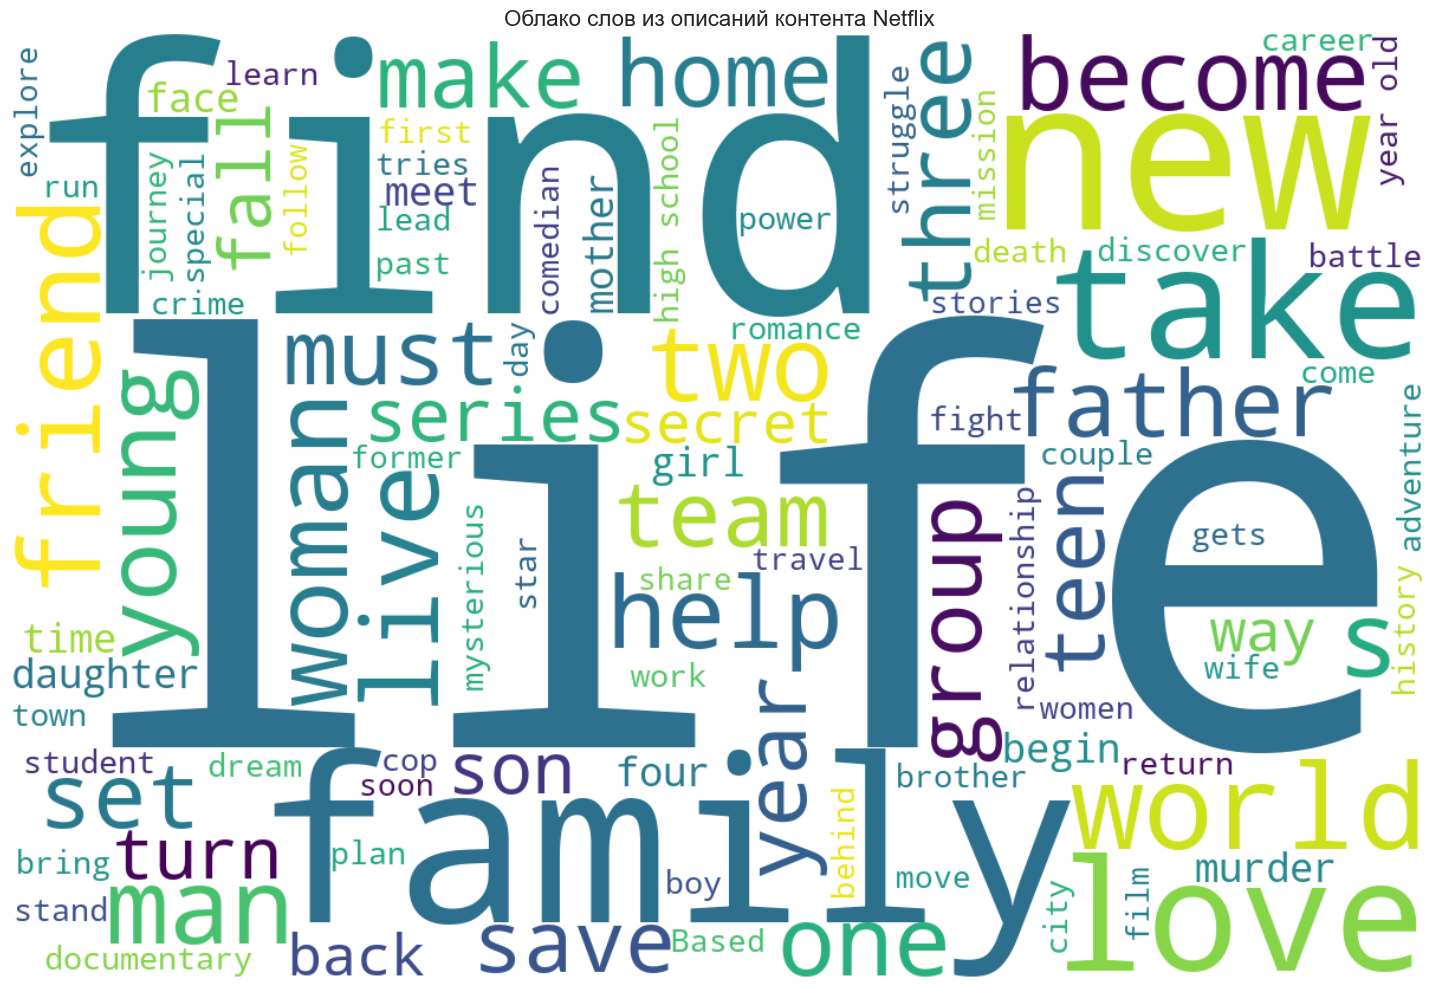

In [29]:
# ## 8. Облако слов по описаниям
# %%
# Создаем облако слов
text = ' '.join(df['description'].dropna().astype(str))

plt.figure(figsize=(15, 10))
wordcloud = WordCloud(
    width=1200, 
    height=800, 
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из описаний контента Netflix', size=16)
plt.tight_layout()
plt.savefig('../images/wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# ## 9. Выводы и наблюдения
# 
# ### Основные выводы:
# 1. **Соотношение:** Большинство контента - фильмы (≈70%)
# 2. **Производство:** США - абсолютный лидер по производству контента
# 3. **Тренды:** Наблюдается экспоненциальный рост добавления контента после 2015 года
# 4. **Рейтинги:** Наиболее распространены рейтинги TV-MA, TV-14, TV-PG
# 5. **Жанры:** Международные фильмы, драмы и комедии - самые популярные категории
# 
# ### Потенциальные направления для дальнейшего анализа:
# - Анализ популярных актеров и режиссеров
# - Сезонность добавления контента
# - Сравнение стратегий Netflix в разных странах